In [2]:
import pandas as pd
import  numpy as np
import seaborn as sns

In [24]:
data = pd.read_csv(r'E:\Study materials\python and data science\ML Projects\Used Cars\Data_Train.csv')
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,2.625,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,15,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,9,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,49.672,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,6.8,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,8.12,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,3.18,2.65


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6018 entries, 0 to 6017
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6018 non-null   object 
 1   Location           6018 non-null   object 
 2   Year               6018 non-null   int64  
 3   Kilometers_Driven  6018 non-null   int64  
 4   Fuel_Type          6018 non-null   object 
 5   Transmission       6018 non-null   object 
 6   Owner_Type         6018 non-null   object 
 7   Mileage            6018 non-null   int32  
 8   Engine             6018 non-null   int32  
 9   Power              6018 non-null   int32  
 10  Seats              6018 non-null   float64
 11  Price              6018 non-null   float64
dtypes: float64(2), int32(3), int64(2), object(5)
memory usage: 493.8+ KB


In [31]:
data['Mileage']=data['Mileage'].str.replace('kmpl','')
data['Engine']=data['Engine'].str.replace('CC','')
data['Power']=data['Power'].str.replace('bhp','')
data['Mileage']=data['Mileage'].str.replace('km/kg','')
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


In [82]:
# del data['New_Price']
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [97]:
data['Seats'].fillna(method ='ffill', inplace = True)
data['Mileage'].fillna(method ='ffill', inplace = True)
data['Engine'].fillna(method ='ffill', inplace = True)
data['Power'].fillna(method ='ffill', inplace = True)



In [73]:
# data['Mileage'].astype(float)
# data['Power'].astype(float)
# data['Engine'].astype(float)
data['Mileage'] = pd.to_numeric(data['Mileage'],errors = 'coerce')
data['Power'] = pd.to_numeric(data['Power'],errors = 'coerce')
data['Engine'] = pd.to_numeric(data['Engine'],errors = 'coerce')

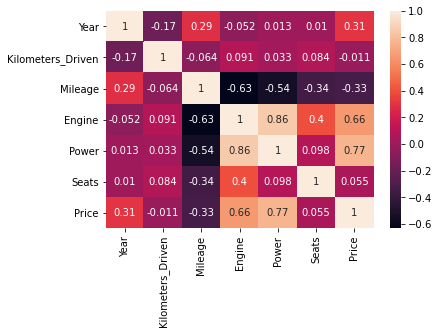

In [90]:
sns.heatmap(data.corr(),annot=True)

data = data.astype({"Mileage":"int","Engine":"int","Power":"int"})

In [40]:
# Cleaning th car name by splitting the car name on basis of spaces, removing all the words after 3 in car name column, and agang joining with spaces
data['Name']=data['Name'].str.split(' ').str.slice(0,3).str.join(' ')
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [41]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,5953.000000,5983.000000,5876.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.340776,1621.276450,113.253050,5.279615,9.479468
std,3.269742,9.126884e+04,4.176793,601.355233,53.874957,0.807740,11.187917
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.300000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.200000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [44]:
# max vlaue seems like an outlier as it is very high as compared to the 75%, checking the data and removing the outlier
data[data['Price']>159]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,Land Rover Range,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0


In [46]:
# removing the outlier 
data=data[data['Price']<159].reset_index(drop=True)

In [111]:
# saving the csv
data.to_csv('Cleaned_data.csv')

In [53]:
# Preparin the model by removing price column from data as all other are features and price is dependant variable
X=data.drop(columns='Price')
y=data['Price']

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [114]:
ohe=OneHotEncoder()
ohe.fit(X[['Name','Location','Fuel_Type','Transmission','Owner_Type']])

OneHotEncoder()

In [125]:
# instead of manually encodeing the values we used MCT to transform the columns using OHE
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Location','Fuel_Type','Transmission','Owner_Type']))

In [126]:
lr = LinearRegression()

In [127]:
pipe = make_pipeline(column_trans,lr)

In [128]:
data['Mileage'].fillna(int(data['Mileage'].mean()), inplace=True)
data['Engine'].fillna(int(data['Engine'].mean()), inplace=True)
data['Power'].fillna(int(data['Power'].mean()), inplace=True)

In [130]:
 pipe.fit(X_train,y_train)

In [133]:
 y_pred=pipe.predict(X_test)

In [ ]:
r2_score=(y_test,y_pred)

In [ ]:
# looping all the random states to get best r2_squared value
#creating empty list of values 
scores=[]
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score=(y_test,y_pred))

In [ ]:
np.argmax(scores)

In [ ]:
scores[np.argmax(scores)]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=np.argmax(scores))
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    r2_score=(y_test,y_pred)